In [1]:
import pandas as pd

print(f"{'pandas':<11} {pd.__version__:<6}")

import numpy as np

print(f"{'numpy':<11} {np.__version__:<6}")

import plotly

print(f"{'plotly':<11} {pd.__version__:<6}")

import matplotlib
import matplotlib.pyplot as plt
print(f"{'matplotlib':<11} {matplotlib.__version__:<6}")

import itertools

from adtk import __version__ as adtk_version

print(f"{'adtk':<11} {adtk_version:<6}")

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD
from adtk.detector import QuantileAD
from adtk.detector import InterQuartileRangeAD
from adtk.detector import PersistAD
from adtk.detector import LevelShiftAD
from adtk.detector import VolatilityShiftAD
from adtk.detector import SeasonalAD
from adtk.detector import AutoregressionAD
from adtk.detector import MinClusterDetector
from adtk.detector import OutlierDetector
from adtk.detector import PcaAD
from adtk.detector import GeneralizedESDTestAD

from adtk.data import validate_series
from adtk.visualization import plot

from sklearn import __version__ as sklearn_version

print(f"{'sklearn':<11} {sklearn_version:<6}")
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans

from io import StringIO
#from support.convertion import load_conversion_from
#from support.parsers import p2f
#from support.parsers import d2d
from datetime import datetime, timedelta
from typing import List, Dict

# plt.rcParams["figure.figsize"] = [14, 10]
# plt.style.use("ggplot")

%matplotlib inline
%load_ext autoreload
%autoreload 2

pandas      1.1.3 
numpy       1.19.1
plotly      1.1.3 
matplotlib  3.3.1 
adtk        0.6.2 


C:\Users\Walter Cassino\anaconda3\envs\ddatos21_ment_tp3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


sklearn     0.23.2


<AxesSubplot:title={'center':'Dist'}>

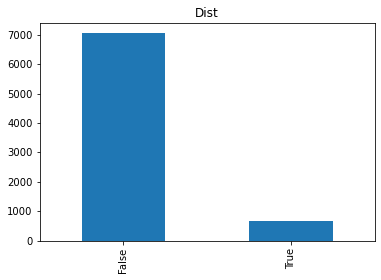

In [2]:
df0: pd.DataFrame = pd.read_csv(
    "datasets/traffic_AR_CL_UY+features+column_classifier.csv",
    parse_dates=["Fecha"]
)

df0["Fecha"] = pd.to_datetime(df0["Fecha"], utc=True)

df0["anomaly"].value_counts().plot(kind='bar', 
                                     title='Dist')

In [3]:
import plotly.graph_objects as go


def anomaly_plot(
    ts=None, anomaly=None, anomaly_color: str = "red", mode: str = "markers", title=""
):

    df: pd.DataFrame = None
    anomalies: pd.DataFrame = None

    if ts is not None:
        # type check for ts
        if isinstance(ts, pd.Series):
            if ts.name is None:
                df = ts.to_frame("Time Series")
            else:
                df = ts.to_frame()
        elif isinstance(ts, pd.DataFrame):
            df = ts.copy()
        else:
            raise TypeError("Argument `ts` must be a pandas Series or DataFrame.")

        # check series index
        if not isinstance(df.index, pd.DatetimeIndex):
            raise TypeError(
                "Index of the input time series must be a pandas "
                "DatetimeIndex object."
            )

        # check duplicated column names
        if df.columns.duplicated().any():
            raise ValueError("Input DataFrame must have unique column names.")

    else:  # no time series, just event
        df = pd.DataFrame(dtype=int)

    # plot anomaly
    if anomaly is not None:
        pass
    else:
        raise ValueError("Anomaly values should be provided")

    if isinstance(anomaly, pd.Series):

        anomaly: pd.Series = anomaly
        idx: pd.DatetimeIndex = anomaly[anomaly == True].index

        if anomaly.name in df.columns:
            anomalies: pd.DataFrame = df.loc[idx][anomaly.name].to_frame()
        else:
            anomalies: pd.DataFrame = df.loc[idx]
    elif isinstance(anomaly, pd.DataFrame):
        anomaly: pd.DataFrame = anomaly
        anomalies: pd.DataFrame = pd.DataFrame(columns=df.columns)
        for anomaly_name in anomaly.columns:
            if anomaly_name in df.columns:
                anomalies = pd.concat(anomalies, df.loc[anomaly[anomaly_name] == True])

    fig = go.Figure()

    for column_name in df.columns:
        # Add scatter trace for line
        fig.add_trace(
            go.Scatter(x=df.index, y=df[column_name], mode="lines", name=column_name)
        )
    for column_name in anomalies.columns:
        fig.add_trace(
            go.Scatter(
                x=anomalies.index,
                y=anomalies[column_name],
                mode="markers",
                marker=dict(
                    color="LightSkyBlue",
                    size=6,
                    opacity=0.5,
                    line=dict(color="red", width=2),
                ),
                showlegend=False,
            ),
        )
    fig.update_layout(
        title={"text": title,}
    )
    fig.show()

In [4]:
# Model Evaluation
from sklearn.metrics import confusion_matrix

def confusion_matrix_plot( Y_test, Y_preds ):

    conf_mat = confusion_matrix(Y_test, Y_preds)
    print(conf_mat)
    with plt.style.context(('ggplot', 'seaborn')):
        fig = plt.figure(figsize=(6,6), num=1)
        plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
        plt.xticks([0,1],[0,1])
        plt.yticks([0,1],[0,1])
        plt.xlabel('Predicted Label')
        plt.ylabel('Actual Label')
        for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                    plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
        plt.grid(None)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.show()



In [5]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

def print_report( Y_test, Y_preds ):
    print('Precision                                   : %.3f'%precision_score(Y_test, Y_preds))
    print('Recall                                      : %.3f'%recall_score(Y_test, Y_preds))
    print('F1-Score                                    : %.3f'%f1_score(Y_test, Y_preds))
    print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(Y_test, Y_preds))
    print('\nClassification Report                       : ')
    print(classification_report(Y_test, Y_preds))

['MLA']
['direct']
['Android']


[[436   0]
 [ 32  20]]


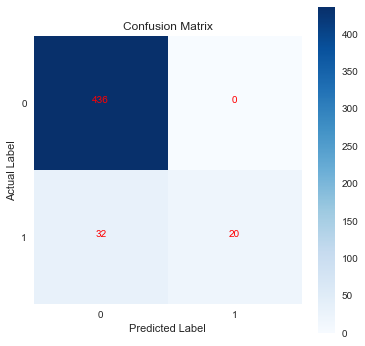

Precision                                   : 1.000
Recall                                      : 0.385
F1-Score                                    : 0.556

Precision Recall F1-Score Support Per Class : 
 (array([0.93162393, 1.        ]), array([1.        , 0.38461538]), array([0.96460177, 0.55555556]), array([436,  52], dtype=int64))

Classification Report                       : 
              precision    recall  f1-score   support

       False       0.93      1.00      0.96       436
        True       1.00      0.38      0.56        52

    accuracy                           0.93       488
   macro avg       0.97      0.69      0.76       488
weighted avg       0.94      0.93      0.92       488



In [23]:
sites: List[str] = list(df0["Site"].unique())
flows: List[str] = list(df0["flow"].unique())
devices: List[str] = list(df0["Device"].unique())

sites = ["MLA"]
flows = ["direct"]
devices= ["Android"]
    
print(sites)
print(flows)
print(devices)

criteria = [
    (site, flow, device) for site in sites for flow in flows for device in devices
]

for (site, flow, device) in criteria:
    # print(f"⚪ Finding missing dates for  '({site},{flow})' on '{device}' ")

    result: pd.DataFrame = df0.query(
        f""" Site == "{site}" and flow == '{flow}' and Device == '{device}' """
    )
    if len(result.index) < 1:
        # print(f"🟢 No value found on '{site}' and flow '{flow}'\n")
        continue
        
    serie = result.set_index(["Fecha"])
    # Usaremos la conversion total como input
    s = serie["TOTAL"]
    s = validate_series(s)

    quantile_ad = QuantileAD(high=0.98, low=0.02)
    anomalies = quantile_ad.fit_detect(s)
    anomaly_plot(
         s,
         anomaly=anomalies,
         anomaly_color="red",
         title=f" QuantileAD Plot for site {site} on flow {flow} and device {device}",
    )
       
    # volatility_shift_ad = VolatilityShiftAD(c=2.5, side="both", window=14)
    # anomalies = volatility_shift_ad.fit_detect(s)
    # anomaly_plot(s, anomaly=anomalies, anomaly_color="red")

    # try:
    #    level_shift_ad = LevelShiftAD(c=3.0, side='both', window=14)
    #    sad_anomalies = level_shift_ad.fit_detect(s)
    #    anomaly_plot(
    #       s,
    #       anomaly=sad_anomalies,
    #       anomaly_color="red",
    #       title=f" Shift Anomaly Plot for site {site} on flow {flow} and device {device}",
    #   )   
    # except:
    #     print("An exception occurred")
    
    # esd_ad = GeneralizedESDTestAD(alpha=0.05)
    # esd_anomalies = esd_ad.fit_detect(s)
    # anomaly_plot(s, anomaly=esd_anomalies, anomaly_color="red")

    #autoregression_ad = AutoregressionAD(n_steps=7 * 2, step_size=3, c=3.0)
    #anomalies = autoregression_ad.fit_detect(s)
    #anomaly_plot(s, anomaly=anomalies, anomaly_color="red")

    outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.6))
    outlier_detector = OutlierDetector(IsolationForest(contamination=0.35))
    outlier_detector = OutlierDetector(EllipticEnvelope(contamination=0.23))

    od_anomalies = outlier_detector.fit_detect(s.to_frame())
    anomaly_plot(
    s,
        anomaly=od_anomalies,
        anomaly_color="red",
        title=f" OutlierDetector Plot for site {site} on flow {flow} and device {device}",
    )
    
    #min_cluster_detector = MinClusterDetector(KMeans(n_clusters=4))
    #anomalies = min_cluster_detector.fit_detect(s.to_frame())
    #anomaly_plot(s, anomaly=anomalies, anomaly_color="red")

    # seasonal_ad = SeasonalAD(c=3.0, side="both")
    # anomalies = seasonal_ad.fit_detect(s)
    # anomaly_plot(s, anomaly=anomalies, anomaly_color="red")

    
    Y_test = serie["anomaly"]
    Y_preds = anomalies

    confusion_matrix_plot(Y_test, Y_preds)
    print_report(Y_test, Y_preds)